# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#after directly downloading and uploading the twitter-archive-enhanced.csv file  
tae= pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#programatically downloading image_predictions.tsv file 
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb')as file:
    file.write(response.content)

In [4]:
image_pre = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
consumer_key = 'PRIVATE'
consumer_secret = 'PRIVATE'
access_token = 'PRIVATE'
access_secret = 'PRIVATE'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [6]:
#get tweet ids for use in tweepy
tweet_ids = tae.tweet_id.values
len(tweet_ids)

2356

In [20]:
#query additional data via the Twitter API (tweet_json.txt)
from timeit import default_timer as timer
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # due to Twitter's  wait on rate limit, this loop will take 20 to 30 mins to run
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [8]:
#create empty list and populate one by one 
with open ('tweet_json.txt') as json_file:
    df_lis=[]
    for line in json_file: 
        data=json.loads(line)
        df_lis.append({'tweet_id':data['id'],
                       'retweet_count':data['retweet_count'],
                       'favorite_count':data['favorite_count']})
       

In [9]:
#convert list to pandas dataframe
js=pd.DataFrame(df_lis, columns=['tweet_id','retweet_count','favorite_count'] )

## Assessing Data
Detecting and documenting at least **eight (8) quality issues and two (2) tidiness issue**. Using **both** visual assessment and programmatic assessement to assess the data.

In [10]:
#display the twitter-archive-enhanced.csv file
tae

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
#check if there are  any tweets gathered beyond August 1st, 2017
tae.timestamp.sort_values(ascending=False)

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-0

In [12]:
tae.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
tae.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
tae.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
#display the image_predictions.tsv
image_pre

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
image_pre.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
image_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
#display the tweet_json.txt file
js

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6975,33697
1,892177421306343426,5277,29230
2,891815181378084864,3466,21974
3,891689557279858688,7189,36777
4,891327558926688256,7721,35162
5,891087950875897856,2586,17737
6,890971913173991426,1649,10323
7,890729181411237888,15691,56634
8,890609185150312448,3605,24433
9,890240255349198849,6075,27845


In [20]:
js.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [21]:
js.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2460.361839,7027.106575
std,6.820795e+16,4166.732245,10918.404491
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,492.500000,1221.000000
50%,7.178418e+17,1146.000000,3038.000000
75%,7.986547e+17,2846.000000,8565.500000
max,8.924206e+17,70392.000000,144253.000000


In [22]:
all_columns = pd.Series(list(tae) + list(image_pre) + list(js))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Quality issues
1. tae: expanded urls have null values( only difference is the ID in all of them at the end )

2. tae: timestamp datatype should be date/time and remove the +0000

3. tae: Remove the href tags from source

4. tae:retweeted_status_id  to remove the non null rows in since we want data without retweets

5. tae:extract direct links from the text columns 

6. tae: name like 'such' is all in lowercase while the rest start with a capital letter

7. tae:drop unecessary columns- in_reply_to_status_id,in_reply_to_user_id,source,retweeted_status_id, retweeted_status_user_id	and retweeted_status_timestamp

8. image_pre: names of dogs in p1,p2,p3 are inconsistent	

9. image_pre: Since p1 is the most accurate prediction for the image drop the false ones 

### Tidiness issues
1. tae:doggo,floofer,pupper	and puppo should all be in one column called stage

2. Each observational unit forms a table:There should only be two tables tae(twitter-archive-enhanced) and image_pre(image_predictions) 



## Cleaning Data
Cleaning **all** of the issues documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
tae_clean= tae.copy()
image_clean= image_pre.copy()
js_clean= js.copy()

### Issue #1:
   tae:retweeted_status_id to remove the **non-null** rows since we want data without retweets

#### Define:
Since we want data without retweets, we will remove the non null rows and remain with data that has a **null ID** which implies that it wasn't retweeted

#### Code

In [24]:
#collect the null data only
tae_clean= tae_clean[tae_clean.retweeted_status_id.isnull()]

#### Test

In [25]:
#check if there's any non-null entry in the retweeted status_id column 
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #2:
tae: timestamp datatype should be **date/time** and remove the +0000

#### Define
change datatype from object using pd.to_datetime and it will automatically slice the last 5 characters(+0000)

#### Code

In [26]:
tae_clean['timestamp']= pd.to_datetime(tae_clean['timestamp'])

#### Test

In [27]:
#check if +0000 is removed from the data
tae_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1871,675147105808306176,NaN,NaN,2015-12-11 02:56:28,"<a href=""http://twitter.com/download/iphone"" r...",When you're presenting a group project and the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675147105...,10,10,None,None,None,None,None
1991,672622327801233409,NaN,NaN,2015-12-04 03:43:54,"<a href=""http://twitter.com/download/iphone"" r...",This lil pupper is sad because we haven't foun...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672622327...,12,10,None,None,None,pupper,None
1512,691321916024623104,NaN,NaN,2016-01-24 18:09:23,"<a href=""http://twitter.com/download/iphone"" r...",This is Molly. She's a Peruvian Niddlewog. Lov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691321916...,11,10,Molly,None,None,None,None


In [28]:
tae_clean.timestamp.sort_values(ascending=False)

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
30     2017-07-15 16:51:35
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

In [29]:
#check if datatype has changed
tae_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Issue #3:
   tae: expanded urls have **null** values( only difference is the ID in all of them at the end )

#### Define
The missing data can be filled in using the fillna function since the urls are only different on the twitter ID at the end of the link.

#### Code

In [30]:
#the beginning of the url
urls = 'https://twitter.com/dog_rates/status/'

#combine the url and the twitter ID
nan_urls = urls+tae_clean['tweet_id'].astype(str)

#using the fillna function to fill in the null values
tae_clean.expanded_urls.fillna(nan_urls, inplace=True) 

#### Test

In [31]:
tae_clean['expanded_urls'].sample(5)

1359    https://twitter.com/dog_rates/status/703356393...
236     https://twitter.com/dog_rates/status/847251039...
15      https://twitter.com/dog_rates/status/889278841...
2174    https://twitter.com/dog_rates/status/669216679...
1394    https://twitter.com/dog_rates/status/700002074...
Name: expanded_urls, dtype: object

In [32]:
#check if there are any null values
tae_clean.expanded_urls.isnull().sum()

0


### Issue #4:
   tae: Remove the **href tags** from source

#### Define
Using regular expessions to remove href tags 

#### Code

In [33]:
#remove tags
import re as re
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
tae_clean['source']=tae_clean['source'].apply(lambda cw : remove_tags(cw))

#### Test

In [34]:
#check values that are in the source column have no href tags
tae_clean['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [35]:
tae_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
304,836380477523124226,NaN,NaN,2017-02-28 01:00:19,Twitter for iPhone,This is Ava. She just blasted off. Streamline ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836380477...,12,10,Ava,None,None,pupper,None
590,799297110730567681,NaN,NaN,2016-11-17 17:04:16,Twitter for iPhone,This is Jeffrey. He's quite the jokester. Take...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799297110...,11,10,Jeffrey,None,None,None,None
1150,726224900189511680,NaN,NaN,2016-04-30 01:41:23,Twitter for iPhone,I'm getting super heckin frustrated with you a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726224900...,9,10,None,None,None,None,None
1246,711694788429553666,NaN,NaN,2016-03-20 23:23:54,Twitter for iPhone,Oh. My. God. 13/10 magical af https://t.co/Ezu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711694788...,13,10,None,None,None,None,None
536,807010152071229440,NaN,NaN,2016-12-08 23:53:08,Twitter for iPhone,This is Lennon. He's a Boopershnoop Pupperdoop...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807010152...,12,10,Lennon,None,None,None,None


### Issue #5:
   tae: name data is not consistent like 'such','quite' all in **lowercase** while the rest start with a capital letter

#### Define
Convert the data in name to title case also known as proper case, where words begin with a capital letter. 

#### Code

In [36]:
#convert to title case
tae_clean.name= tae_clean.name.str.title()

#### Test

In [37]:
#check visually whether data in the name column is consistent
tae_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Issue #6:
   tae:**extract** direct links from the text columns 

#### Define
Get working links for the twitter pages from the text column using regex

#### Code

In [38]:
#create a column for direct links by extracting from the string
tae_clean['text']=tae_clean['text'].astype(str)
pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)'
tae_clean['direct_links'] = ''
tae_clean['direct_links']= tae_clean['text'].str.extract(pattern, expand=True)


#### Test

In [39]:
#display a sample
tae_clean.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,direct_links
2063,671159727754231808,NaN,NaN,2015-11-30 02:52:03,Twitter for iPhone,This is Anthony. He just finished up his maste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671159727...,5,10,Anthony,None,None,None,None,https://t.co/iHLo9rGay1
619,796149749086875649,NaN,NaN,2016-11-09 00:37:46,Twitter for iPhone,This is Ruby. She just turned on the news. Off...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796149749...,11,10,Ruby,None,None,None,None,https://t.co/y5KarNXWXt
358,830097400375152640,NaN,NaN,2017-02-10 16:53:37,Twitter for iPhone,Meet Samson. He's absolute fluffy perfection. ...,NaN,NaN,NaN,"https://www.gofundme.com/sick-baby-samson,http...",13,10,Samson,None,None,None,None,https://t.co/z82hCtwhpn
58,880935762899988482,NaN,NaN,2017-06-30 23:47:07,Twitter for iPhone,This is Louis. He's crossing. It's a big deal....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880935762...,13,10,Louis,None,None,None,None,https://t.co/D0wb1GlKAt


In [40]:
#show the links
tae_clean['direct_links']

0       https://t.co/MgUWQ76dJU
1       https://t.co/0Xxu71qeIV
2       https://t.co/wUnZnhtVJB
3       https://t.co/tD36da7qLQ
4       https://t.co/AtUZn91f7f
5       https://t.co/kQ04fDDRmh
6       https://t.co/Zr4hWfAs1H
7       https://t.co/v0nONBcwxq
8       https://t.co/9TwLuAGH0b
9       https://t.co/t1bfwz5S2A
10      https://t.co/dVPW0B0Mme
11      https://t.co/u1XPQMl29g
12      https://t.co/BxvuXk0UCm
13      https://t.co/f8dEDcrKSR
14      https://t.co/y70o6h3isq
15      https://t.co/WpHvrQedPb
16      https://t.co/chxruIOUJN
17      https://t.co/HTQ77yNQ5K
18      https://t.co/YnYAFCTTiK
20      https://t.co/DK7iDPfuRX
21      https://t.co/PhrUk20Q64
22      https://t.co/20VrLAA8ba
23      https://t.co/cLyzpcUcMX
24      https://t.co/WZqNqygEyV
25      https://t.co/4Ad1jzJSdp
26      https://t.co/I6oNy0CgiT
27      https://t.co/bVi0Yr4Cff
28      https://t.co/BCoWue0abA
29      https://t.co/RGE08MIJox
30                          NaN
                 ...           
2326    

In [41]:
tae_clean.direct_links.isnull().sum()

58

### Issue #7:
   tae:drop unecessary columns

#### Define
drop the following columns since they are not necessary in_reply_to_status_id,in_reply_to_user_id,source,retweeted_status_id, retweeted_status_user_id	and retweeted_status_timestamp

#### Code

In [42]:
#removing columns based on column index
tae_clean.drop(tae_clean.columns[[1,2,6,7,8]],axis=1, inplace=True)

#### Test

In [43]:
tae_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,direct_links
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://t.co/0Xxu71qeIV


In [44]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
direct_links          2117 non-null object
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 237.9+ KB


### Issue #8:
   image_pre: names of dogs in p1,p2,p3 are inconsistent

#### Define
Apply a function that will change them all to lowercase inorder for it to achieve consistency  

#### Code

In [45]:
#create a lowercase function
lowercase= lambda x: x.lower()

#apply the lowercase function
image_clean['p1']= image_clean['p1'].apply(lowercase)
image_clean['p2']= image_clean['p2'].apply(lowercase)
image_clean['p3']= image_clean['p3'].apply(lowercase)

#### Test

In [46]:
#visually observe that data is consistent 
image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Issue #9:
   image_pre: Since p1 is the most accurate prediction for the image drop the false ones 

#### Define
Show the most accurate prediction followed by the other predictions

#### Code

In [47]:
#drop false dog predictions in p1
image_clean.drop(image_clean[image_clean['p1_dog'] == False].index, inplace=True)

#### Test

In [48]:
#check if all p1_dog vales are all True
image_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

In [49]:
image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,tibetan_mastiff,0.093718,True,labrador_retriever,0.072427,True
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,gordon_setter,0.503672,True,yorkshire_terrier,0.174201,True,pekinese,0.109454,True


### Tidiness
    

### Issue #1:
   tae:doggo,floofer,pupper and puppo should all be in one column called **stage**

#### Define
Some dogs have more than one stage thus the four columns will need to be joined into a new string and take note in dropping the null values so that they dont appear as a string in the new column 

#### Code

In [50]:
#replace None with NaN values
tae_clean['doggo'].replace('None', np.nan, inplace=True)
tae_clean['floofer'].replace('None', np.nan,inplace=True)
tae_clean['pupper'].replace('None', np.nan, inplace=True)
tae_clean['puppo'].replace('None', np.nan, inplace=True)

In [51]:
#use stack which will drop the NaN, then use groupby.agg and separator',' and .join the strings
tae_clean['stage'] = tae_clean[['doggo', 'floofer', 'pupper', 'puppo']].stack().groupby(level=0).agg(','.join)
#drop the columns since it will be irrelevant
tae_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis=1, inplace=True)

In [52]:
#fill the null columns in stage with none
tae_clean.stage= tae_clean.stage.fillna('None')

#### Test

In [53]:
#check if the column stage has been created and doggo,floofer,pupper and puppo have been dropped
tae_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,direct_links,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://t.co/MgUWQ76dJU,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://t.co/0Xxu71qeIV,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://t.co/wUnZnhtVJB,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://t.co/tD36da7qLQ,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://t.co/AtUZn91f7f,None
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,https://t.co/kQ04fDDRmh,None
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,https://t.co/Zr4hWfAs1H,None
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,https://t.co/v0nONBcwxq,None
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,https://t.co/9TwLuAGH0b,None
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,https://t.co/t1bfwz5S2A,doggo


In [54]:
#checking which values are in the stage column 
tae_clean.stage.value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: stage, dtype: int64

### Issue #2:
   Each observational unit forms a table:There should only be two tables tae(twitter-archive-enhanced) and image_pre(image_predictions)

#### Define
Merge js and tae since that they share the same observable unit

#### Code

In [55]:
#merge the dataframes
df_clean = pd.merge(tae_clean,js_clean, on='tweet_id', how='inner')

#### Test

In [56]:
#show the merged dataframe
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,direct_links,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://t.co/MgUWQ76dJU,None,6975,33697
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://t.co/0Xxu71qeIV,None,5277,29230
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://t.co/wUnZnhtVJB,None,3466,21974
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://t.co/tD36da7qLQ,None,7189,36777
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://t.co/AtUZn91f7f,None,7721,35162


In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2166
Data columns (total 12 columns):
tweet_id              2167 non-null int64
timestamp             2167 non-null datetime64[ns]
source                2167 non-null object
text                  2167 non-null object
expanded_urls         2167 non-null object
rating_numerator      2167 non-null int64
rating_denominator    2167 non-null int64
name                  2167 non-null object
direct_links          2109 non-null object
stage                 2167 non-null object
retweet_count         2167 non-null int64
favorite_count        2167 non-null int64
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 220.1+ KB


## Storing Data
The gathered, assessed and cleaned datasets are saved in a new csv file as shown below.

In [58]:
#contains the tae and js tables
df_clean.to_csv("twitter_archive_master.csv", index=False)

In [59]:
#has the image predictions table
image_clean.to_csv("image_predictions_clean.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [60]:
df= pd.read_csv("twitter_archive_master.csv")

In [61]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,direct_links,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://t.co/MgUWQ76dJU,None,6975,33697
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://t.co/0Xxu71qeIV,None,5277,29230
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://t.co/wUnZnhtVJB,None,3466,21974
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://t.co/tD36da7qLQ,None,7189,36777
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://t.co/AtUZn91f7f,None,7721,35162


In [62]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2.167000e+03,2167.000000,2167.000000,2167.000000,2167.000000
mean,7.369083e+17,13.219659,10.494693,2226.572681,7545.951546
std,6.742548e+16,47.813636,7.031971,3966.252269,11140.044639
min,6.660209e+17,0.000000,0.000000,1.000000,45.000000
25%,6.768157e+17,10.000000,10.000000,476.000000,1595.500000
50%,7.095192e+17,11.000000,10.000000,1054.000000,3394.000000
75%,7.892032e+17,12.000000,10.000000,2535.500000,9359.000000
max,8.924206e+17,1776.000000,170.000000,70392.000000,144253.000000


In [63]:
#check the number of dogs per stage
df.stage.value_counts()

None             1824
pupper            224
doggo              74
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: stage, dtype: int64

In [64]:
#check the minimum retweet count
min_re= df.retweet_count.min()
df_min = df.query('retweet_count == {}'.format(min_re))
df_min

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,direct_links,stage,retweet_count,favorite_count
245,838085839343206401,2017-03-04 17:56:49,Twitter for iPhone,@bragg6of8 @Andy_Pace_ we are still looking fo...,https://twitter.com/dog_rates/status/838085839...,15,10,None,NaN,None,1,133


In [65]:
df.favorite_count.min()

45

In [66]:
#check the highest retweet count
max_re= df.retweet_count.max()
df_m = df.query('retweet_count == {}'.format(max_re))
df_m

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,direct_links,stage,retweet_count,favorite_count
855,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,https://t.co/7wE9LTEXC4,doggo,70392,144253


In [67]:
#The highest favorite count
df.favorite_count.max()

144253

In [68]:
df.source.value_counts()

Twitter for iPhone     2035
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

In [69]:
df.rating_numerator.value_counts()

12      498
10      440
11      426
13      303
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
0         2
20        1
24        1
26        1
84        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
15        1
17        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### Insights:
1.Apart from None having the highest number of dogs in the stage column, we can note that the second highest is pupper stage with 224 and some dogs have more than one stage.

2.The tweet with the highest retweet count(70392) also has the highest favorite count (144253) but for the minimum counts it isn't the same. The dog stage with the highest retweet count is of stage doggo.

3.The most common source thats being used to upload files is an Iphone

4.We rate dogs has a unique rating system in that normal rates are usually from 1 to 10 but for this they go over 10.  

### Visualization

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
#sort values based on timestamp in ascending order 
df=df.sort_values(by='timestamp', ascending=True)

In [72]:
#convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M:%S')

#extract year and month
df['year'] = pd.DatetimeIndex(df['timestamp']).year
df['month'] = pd.DatetimeIndex(df['timestamp']).month

#join month and year to one column
df['month_year']=pd.to_datetime(df.year.astype(str)+'-'+df.month.astype(str),format='%Y-%m')
df.drop(['year', 'month'],axis=1, inplace=True)
df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,direct_links,stage,retweet_count,favorite_count,month_year
2166,666020888022790149,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,https://t.co/BLDqew2Ijj,None,420,2284,2015-11-01
2165,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,A,https://t.co/r7mOb2m0UI,None,39,112,2015-11-01
2164,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,A,https://t.co/y671yMhoiR,None,36,100,2015-11-01
2163,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,A,https://t.co/DWnyCjf2mx,None,115,245,2015-11-01
2162,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,https://t.co/4B7cOc1EDq,None,36,88,2015-11-01
2161,666050758794694657,2015-11-16 00:30:50,Twitter for iPhone,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10,A,https://t.co/fvIbQfHjIe,None,50,115,2015-11-01
2160,666051853826850816,2015-11-16 00:35:11,Twitter for iPhone,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,An,https://t.co/v5A4vzSDdc,None,700,1024,2015-11-01
2159,666055525042405380,2015-11-16 00:49:46,Twitter for iPhone,Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10,10,A,https://t.co/rdivxLiqEt,None,196,367,2015-11-01
2158,666057090499244032,2015-11-16 00:55:59,Twitter for iPhone,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10,A,https://t.co/yWBqbrzy8O,None,112,247,2015-11-01
2157,666058600524156928,2015-11-16 01:01:59,Twitter for iPhone,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10,The,https://t.co/pYAJkAe76p,None,47,99,2015-11-01


**Retweet count based over every month per year**

In [73]:
#show the retweet count based over every month per year 
retweets=df.groupby(['month_year'])['retweet_count'].mean()

In [74]:
df_r= pd.DataFrame(retweets)
df_r

,retweet_count
month_year,
2015-11-01,437.020000
2015-12-01,1213.503876
2016-01-01,1277.515464
2016-02-01,1239.016000
2016-03-01,1383.838235
2016-04-01,1307.183333
2016-05-01,1811.666667
2016-06-01,3420.021277
2016-07-01,2274.656250


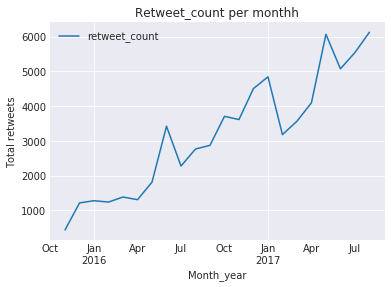

In [75]:
#create a line plot to show the trend 
sns.set_style('darkgrid')
df_r.plot()
plt.title('Retweet_count per monthh')
plt.xlabel("Month_year")
plt.ylabel('Total retweets');

**Correlation between retweet count and favorite count**

In [76]:
#create a dataframe  
df_rf=df[['retweet_count','favorite_count']].copy()
df_rf

,retweet_count,favorite_count
2166,420,2284
2165,39,112
2164,36,100
2163,115,245
2162,36,88
2161,50,115
2160,700,1024
2159,196,367
2158,112,247
2157,47,99


In [77]:
#Correlation measures the degree to which two variables move in relation to each other.
df_rf.corr()

,retweet_count,favorite_count
retweet_count,1.00000,0.92626
favorite_count,0.92626,1.00000


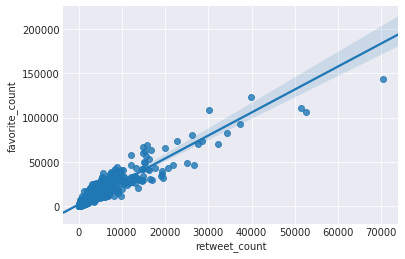

In [78]:
#regression plot for correlation
sns.regplot(x= df_rf['retweet_count'], y=df_rf['favorite_count']);

We observe a positive correlation,this means that the retweet count somehow affects the favorite count